In [0]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [4]:
(xtrain, ytrain),(xtest, ytest) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
Num_classes = 10
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0
ytrain = to_categorical(ytrain, Num_classes)
ytest = to_categorical(ytest, Num_classes)

In [0]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)
x = Dense(units = 200,activation = 'relu')(x)
x = Dense(units =150,activation = 'relu')(x)
output_layer = Dense(units=10,activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
model.fit(xtrain,ytrain,batch_size=32, epochs=10,shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





50000/50000 [==============================] - 24s 484us/step - loss: 1.8511 - acc: 0.3321
Epoch 2/10
50000/50000 [==============================] - 24s 488us/step - loss: 1.6727 - acc: 0.4023
Epoch 3/10
50000/50000 [==============================] - 24s 476us/step - loss: 1.5905 - acc: 0.4319
Epoch 4/10
50000/50000 [==============================] - 24s 482us/step - loss: 1.5386 - acc: 0.4506
Epoch 5/10
50000/50000 [==============================] - 25s 495us/step - loss: 1.4942 - acc: 0.4688
Epoch 6/10
50000/50000 [==============================] - 23s 467us/step - loss: 1.4657 - acc: 0.4781
Epoch 7/10
50000/50000 [==============================] - 23s 469us/step - loss: 1.4379 - acc: 0.4878
Epoch 8/10
50000/50000 [==============================] - 24s 470us/step - loss: 1.4085 - acc: 0.4972
Epoch 9/10
50000/50000 [==============================] - 24s 487us/step - loss: 1

In [12]:
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 1s 75us/step


[1.4844792671203613, 0.4726]

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(xtest)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(ytest, axis = -1)]

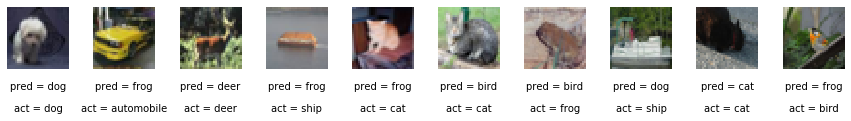

In [18]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(xtest)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
  img = xtest[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)

In [0]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10


In [0]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [0]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(Num_classes)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [24]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(xtrain
          , ytrain
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (xtest, ytest))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 229s 5ms/step - loss: 1.5445 - acc: 0.4604 - val_loss: 1.2313 - val_acc: 0.5617
Epoch 2/10
50000/50000 [==============================] - 226s 5ms/step - loss: 1.1331 - acc: 0.6047 - val_loss: 1.5601 - val_acc: 0.4758
Epoch 3/10
50000/50000 [==============================] - 223s 4ms/step - loss: 0.9969 - acc: 0.6517 - val_loss: 1.1036 - val_acc: 0.6215
Epoch 4/10
50000/50000 [==============================] - 225s 4ms/step - loss: 0.9141 - acc: 0.6825 - val_loss: 0.9049 - val_acc: 0.6850
Epoch 5/10
50000/50000 [==============================] - 225s 5ms/step - loss: 0.8521 - acc: 0.7002 - val_loss: 1.3159 - val_acc: 0.5543
Epoch 6/10
50000/50000 [==============================] - 226s 5ms/step - loss: 0.8038 - acc: 0.7193 - val_loss: 0.8454 - val_acc: 0.7050
Epoch 7/10
50000/50000 [==============================] - 226s 5ms/step - loss: 0.7577 - acc: 0.7352 - val_loss: 1.1037 - 

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(xtest)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(ytest, axis = -1)]

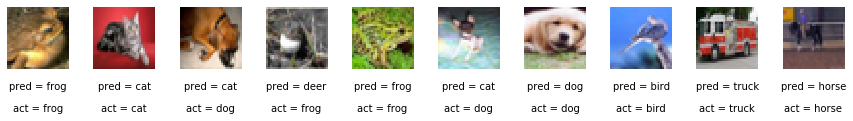

In [27]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(xtest)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = xtest[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [29]:
model.evaluate(xtest, ytest, batch_size=1000)

10000/10000 [==============================] - 15s 2ms/step


[0.8038060307502747, 0.7285000085830688]